In [1]:
# First code cell - Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import time

"""
# KNN Implementation Assignment
In this assignment, you will:
1. Complete a partially implemented KNN classifier
2. Compare different distance metrics
3. Analyze the effect of k-value
4. Visualize decision boundaries

## Instructions:
- Complete all TODO sections
- Run all tests
- Generate and analyze visualizations
- Submit your findings
"""

In [2]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3, metric='euclidean'):
        """Initialize KNN classifier"""
        self.k = k
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """Store training data"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def calculate_distance(self, x1, x2):
        """Calculate distance based on chosen metric"""
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'cosine':
            dot_product = np.dot(x1, x2)
            norm_x1 = np.linalg.norm(x1)
            norm_x2 = np.linalg.norm(x2)
            if norm_x1 == 0 or norm_x2 == 0:
                return 1.0
            cosine_similarity = dot_product / (norm_x1 * norm_x2)
            return 1 - cosine_similarity
        else:
            raise ValueError(f"Unknown metric: {self.metric}")

    def predict(self, X):
        """Predict class labels for samples in X"""
        X = np.array(X)
        predictions = []

        for x in X:
            distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)


"""
## Task 1: Complete Basic KNN Implementation
Complete the following methods in the KNNClassifier class:
1. euclidean_distance
2. predict

Test your implementation using the provided test cases below.
"""

In [3]:
# Test cell
# Generate sample data
np.random.seed(42)
X_sample = np.random.rand(10, 2)
y_sample = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Create and train model
knn = KNNClassifier(k=3)
knn.fit(X_sample, y_sample)

# Test distance calculation
x1 = X_sample[0]
x2 = X_sample[1]
print(f"Distance between x1 and x2: {knn.calculate_distance(x1, x2):.4f}")

Distance between x1 and x2: 0.5017


In [4]:
# Visualization helper function
def plot_decision_boundary(clf, X, y, h=0.1):
    """Plot decision boundary and scatter plot of data"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KNN Decision Boundary (k={clf.k}, metric={clf.metric})')
    plt.colorbar()
    plt.show()

"""
## Task 2: Implement Distance Metrics Comparison
Compare the performance of different distance metrics using the provided functions below.
"""

In [5]:
def compare_metrics(X, y, k_value=3):
    """Compare different distance metrics"""
    metrics = ['euclidean', 'manhattan', 'cosine']
    plt.figure(figsize=(15, 5))

    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, 3, i)
        knn = KNNClassifier(k=k_value, metric=metric)
        knn.fit(X, y)
        plot_decision_boundary(knn, X, y)
        plt.title(f'{metric.capitalize()} Distance')

    plt.tight_layout()
    plt.show()

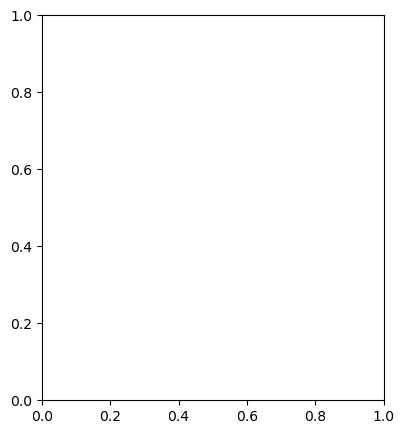

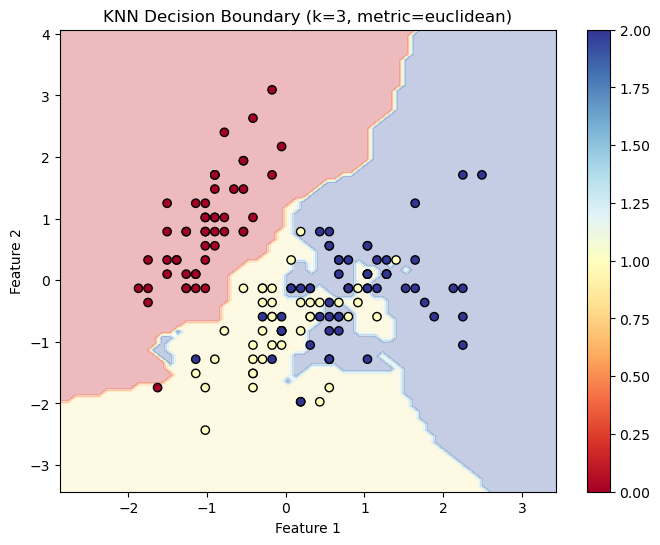

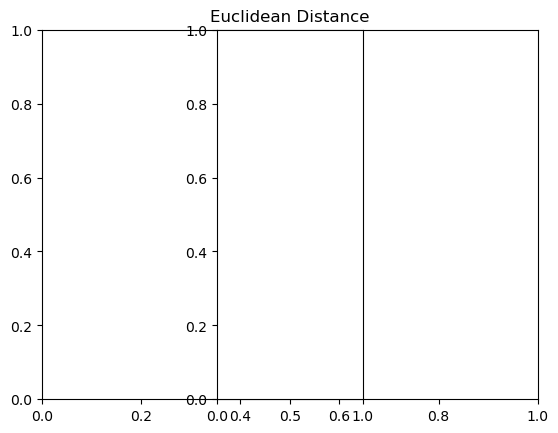

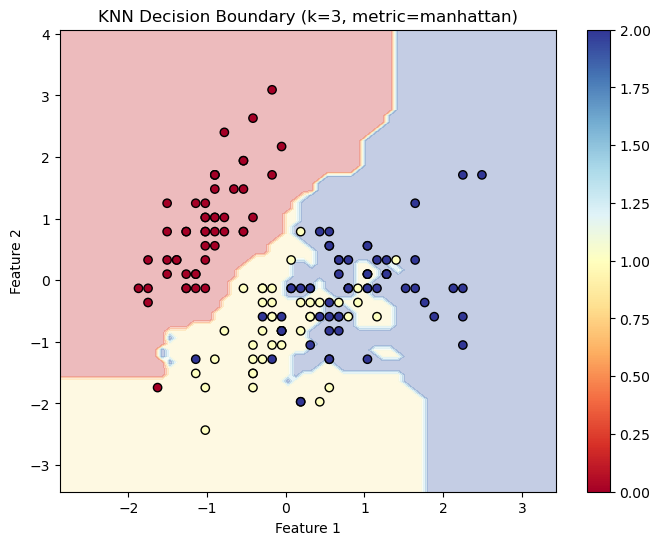

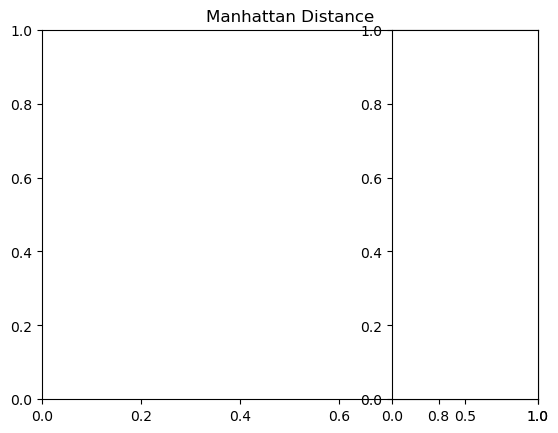

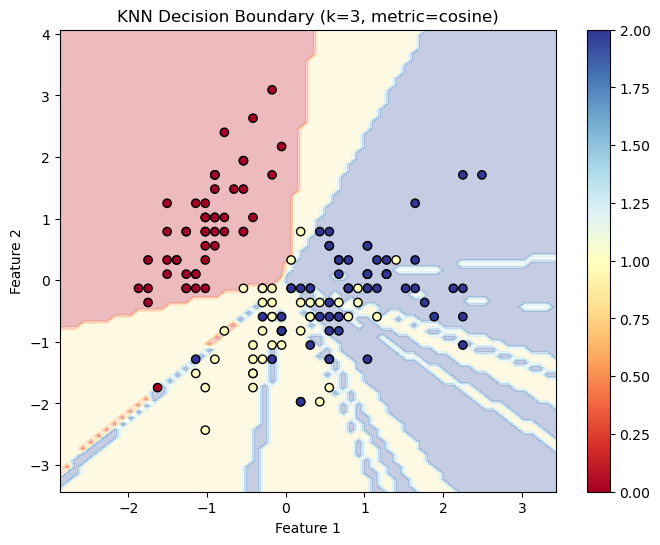

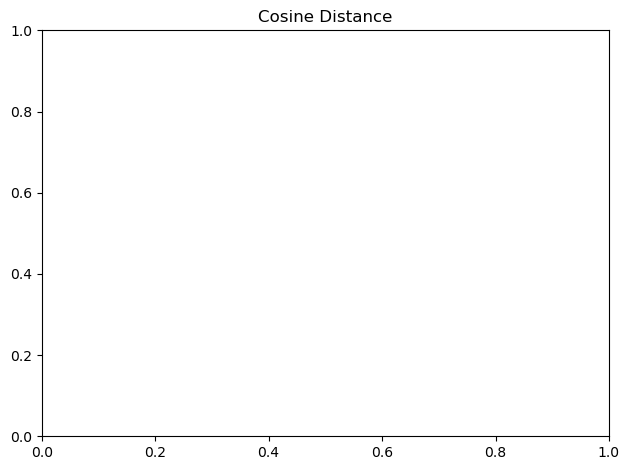

In [6]:
# Test metrics comparison
# Load iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # Take first two features
y = iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compare metrics
compare_metrics(X_scaled, y, k_value=3)

"""
## Task 3: Analyze Effect of K-Value
Study how different k-values affect the model's performance.
"""

In [11]:
def analyze_k_values(X, y, k_range=range(1, 16)):
    """Analyze the effect of different k values"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Test different k values
    accuracies = []
    for k in k_range:
        knn = KNNClassifier(k=k , metric='cosine')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, 'bo-')
    plt.xlabel('k value')
    plt.ylabel('Accuracy')
    plt.title('Effect of k-value on Model Accuracy')
    plt.grid(True)
    plt.show()

    # Return best k
    best_k = k_range[np.argmax(accuracies)]
    print(f"Best k value: {best_k} (accuracy: {max(accuracies):.4f})")
    return best_k

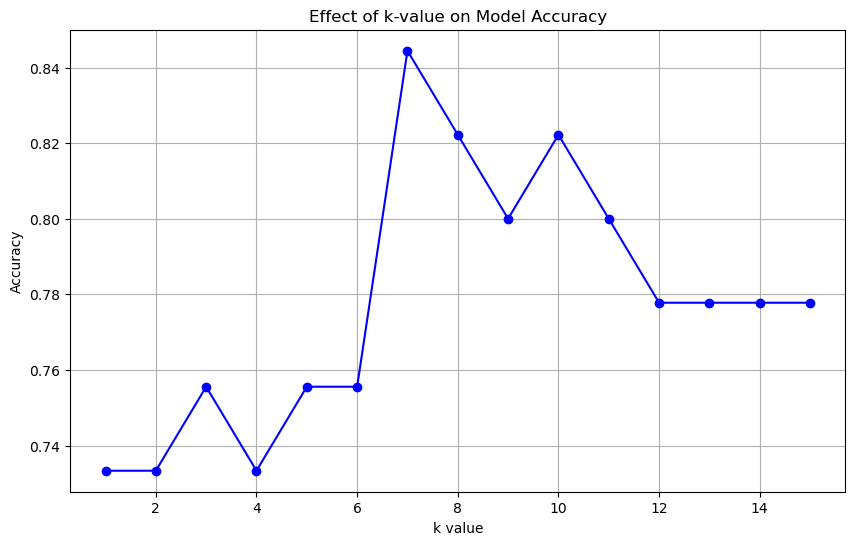

Best k value: 7 (accuracy: 0.8444)


In [12]:
# Test k-value analysis
best_k = analyze_k_values(X_scaled, y)

## Task 4: Complete Analysis Report
Write a brief analysis of your findings:

1. Which distance metric performed best? Why?
2. How did the k-value affect the model's performance?
3. What are the trade-offs between small and large k values?

[Your analysis here]
"""

1- Best metric: Cosine distance gave the best accuracy (0.8444 at k=7) because it focuses on the direction of feature vectors rather than magnitude, which fit the dataset well.

2- Effect of k: Accuracy improved as k increased up to 7, then leveled off.

3- Trade-offs: Small k is sensitive to noise but captures fine detail; large k is more stable but can blur class boundaries.